In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics.cluster import normalized_mutual_info_score, adjusted_rand_score
from sentence_transformers import SentenceTransformer
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\pc cam\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def dim_red(mat, p):

    pca = PCA(n_components=p)
    red_mat = pca.fit_transform(mat)

    
    #red_mat = mat[:,:p]
    
    return red_mat

In [3]:
def clust(mat, k):
    
    kmeans = KMeans(n_clusters=k)
    pred = kmeans.fit_predict(mat)
    #pred = np.random.randint(k, size=len(corpus))

    
    return pred

In [4]:
# import data
ng20 = fetch_20newsgroups(subset='test')
corpus = ng20.data[:2000]
labels = ng20.target[:2000]
k = len(set(labels))

# embedding
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
embeddings = model.encode(corpus)

# perform dimentionality reduction
red_emb = dim_red(embeddings, 20)

# perform clustering
pred = clust(red_emb, k)

# evaluate clustering results
nmi_score = normalized_mutual_info_score(pred,labels)
ari_score = adjusted_rand_score(pred,labels)

print(f'NMI: {nmi_score:.2f} \nARI: {ari_score:.2f}')


NMI: 0.41 
ARI: 0.25


**Visualisation**

***reduction a 2 dimension***

In [7]:
import pandas as pd
# Data Cleaning Pipeline
labels_names = ng20.target_names[:2000]


# Creating a dataframe from the loaded data
news_df = pd.DataFrame({'news': corpus, 
                        'class': labels})

In [8]:
import re
def clean_text(text):
    
    # remove between square brackets
    text = re.sub('\[[^]]*\]', '', text)
    
    # remove URLs
    text = re.sub(r'http\S+', '', text)
    
    # remove @mention
    text = re.sub(r'@[A-Za-z0-9]+','',text)
    
    # remove twitter tags
    text = text.replace("<@>", "")
    
    # remove hashtags
    text = text.replace("#", "")
    
    # remove unwanted punctuations
    text = re.sub('[%s]' % re.escape(""""#$%&'()*+-/,:;<=>[\]^_`{|}~•"""), ' ', text)
    
    # remove extra whitespace
    text = re.sub('\s+', ' ', text) 

    return text.lower()

news_df["cleaned_text"] = news_df["news"].apply(lambda x: clean_text(x))

c:\Users\pc cam\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Users\pc cam\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  

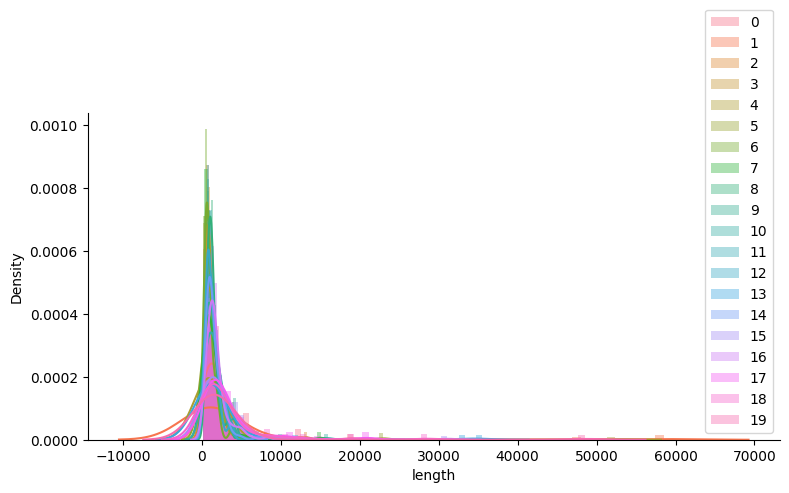

In [9]:
# making length a feature for visualizations
news_df['length']= news_df['news'].apply(len)
g=sns.FacetGrid(news_df,hue='class',height=4,aspect=2)
g=g.map(sns.distplot,'length')
plt.legend()

In [10]:
texts = news_df["cleaned_text"]

In [11]:
# embedding
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
embeddings = model.encode(texts)

# perform dimentionality reduction
red_emb = dim_red(embeddings, 20)

# perform clustering
pred = clust(red_emb, k)

# evaluate clustering results
nmi_score = normalized_mutual_info_score(pred,labels)
ari_score = adjusted_rand_score(pred,labels)

print(f'NMI: {nmi_score:.2f} \nARI: {ari_score:.2f}')

NMI: 0.49 
ARI: 0.30


c:\Users\pc cam\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: 
The markers list has fewer values (5) than needed (20) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
c:\Users\pc cam\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: 
The markers list has fewer values (5) than needed (20) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)


<Figure size 1200x1000 with 0 Axes>

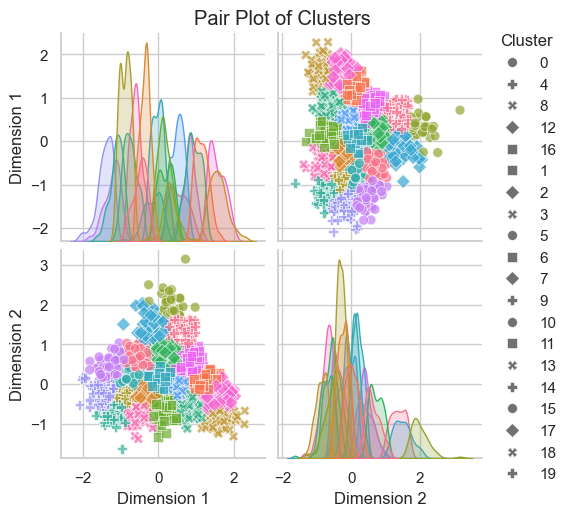

In [12]:
import pandas as pd
# perform dimentionality reduction
red_emb = dim_red(embeddings, 2)

# perform clustering
pred = clust(red_emb, k)

# Combine data and cluster labels into a DataFrame
data_df = pd.DataFrame(red_emb, columns=['Dimension 1', 'Dimension 2'])
data_df['Cluster'] = pred

# Set Seaborn style
sns.set(style='whitegrid')

# Plot pair plot with enhanced aesthetics
plt.figure(figsize=(12, 10))
sns.pairplot(
    data_df,
    hue='Cluster',
    palette='husl',
    markers=["o", "s", "D", "X", "P"],
    diag_kind='kde',  # Kernel density estimation on the diagonal
    plot_kws={'alpha': 0.7, 's': 50},
)
plt.suptitle('Pair Plot of Clusters', y=1.02)
plt.show()

***Scatter plot avec les labels predites***

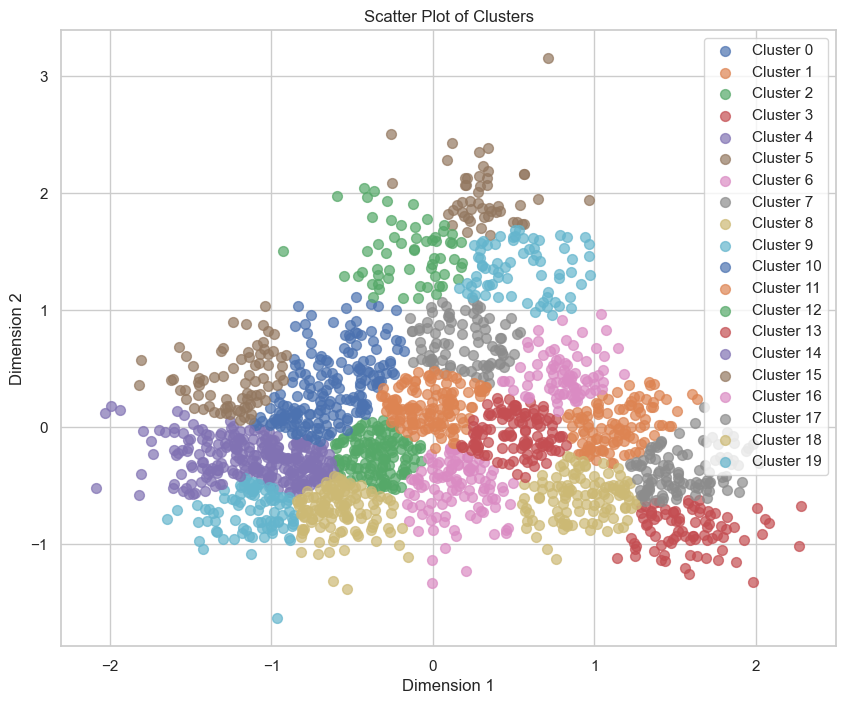

In [13]:
# Set Seaborn style
sns.set(style='whitegrid')

# Scatter plot for each cluster with different colors
plt.figure(figsize=(10, 8))
for i in range(k):
    plt.scatter(
        red_emb[pred == i, 0],
        red_emb[pred == i, 1],
        label=f'Cluster {i}',
        alpha=0.7,
        s=50,
    )

plt.title('Scatter Plot of Clusters')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

***Scatter plot avec les labels réelles***

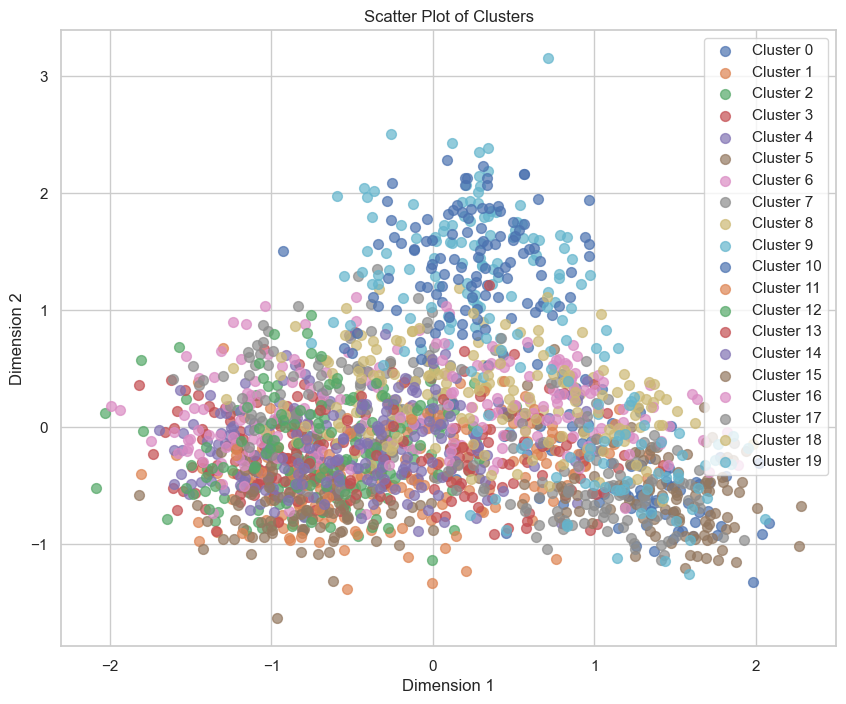

In [14]:
# Scatter plot for each cluster with different colors
plt.figure(figsize=(10, 8))
for i in range(k):
    plt.scatter(
        red_emb[labels == i, 0],
        red_emb[labels == i, 1],
        label=f'Cluster {i}',
        alpha=0.7,
        s=50,
    )

plt.title('Scatter Plot of Clusters')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

***Cross validation***

In [15]:
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score
from sentence_transformers import SentenceTransformer
from sklearn.datasets import fetch_20newsgroups

# Ajoutez vos fonctions dim_red et clust ici

# import data
ng20 = fetch_20newsgroups(subset='test')
corpus = ng20.data[:2000]
labels = ng20.target[:2000]

# embedding
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
embeddings = model.encode(corpus)

# Liste pour stocker les scores
nmi_scores = []
ari_scores = []

# Boucle sur un range de nombres de clusters
for k in range(15, 23):  # Par exemple de 2 à 10 clusters
    # perform dimensionality reduction
    red_emb = dim_red(embeddings, 20)

    # perform clustering
    pred = clust(red_emb, k)

    # evaluate clustering results
    nmi_score = normalized_mutual_info_score(pred, labels)
    ari_score = adjusted_rand_score(pred, labels)

    # Sauvegarde des scores
    nmi_scores.append(nmi_score)
    ari_scores.append(ari_score)

    print(f'Pour k = {k}, NMI: {nmi_score:.2f}, ARI: {ari_score:.2f}')

# Calcul des moyennes des scores NMI et ARI
avg_nmi = sum(nmi_scores) / len(nmi_scores)
avg_ari = sum(ari_scores) / len(ari_scores)

print(f'Moyenne NMI: {avg_nmi:.2f}')
print(f'Moyenne ARI: {avg_ari:.2f}')


Pour k = 15, NMI: 0.39, ARI: 0.22
Pour k = 16, NMI: 0.41, ARI: 0.23
Pour k = 17, NMI: 0.42, ARI: 0.24
Pour k = 18, NMI: 0.41, ARI: 0.24
Pour k = 19, NMI: 0.41, ARI: 0.24
Pour k = 20, NMI: 0.41, ARI: 0.22
Pour k = 21, NMI: 0.41, ARI: 0.23
Pour k = 22, NMI: 0.43, ARI: 0.25
Moyenne NMI: 0.41
Moyenne ARI: 0.23


# Sencond Model of Clustering "HDBScan"

In [21]:
from sklearn.cluster import DBSCAN
def clusthdbs(mat):
    clusterer = hdbscan.HDBSCAN()
    pred = clusterer.fit_predict(mat)
    return pred

In [22]:
# import data
ng20 = fetch_20newsgroups(subset='test')
corpus = ng20.data[:2000]
labels = ng20.target[:2000]
k = len(set(labels))

# embedding
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
embeddings = model.encode(corpus)

# perform dimentionality reduction
red_emb = dim_red(embeddings, 20)

# perform clustering
pred = clusthdbs(red_emb)

# evaluate clustering results
nmi_score = normalized_mutual_info_score(pred,labels)
ari_score = adjusted_rand_score(pred,labels)

print(f'NMI: {nmi_score:.2f} \nARI: {ari_score:.2f}')

AttributeError: 'function' object has no attribute 'HDBSCAN'